In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 1. Introduction-------------------------------------------------------------------------------------

# 2. Personal method------------------------------------------------------------------------------

<div>
<img src="lowrescircle.png" width="150"/>
<img src="graphslopes.png" width="500"/>
<img src="valueslopes.png" width="300"/>
</div>

In [3]:
# This function will perform the previous slope calculation.

def Pentes(contour, pas=1):
   L = np.ones(0)
   X=[]
   Y=[]
   for i in range(len(contour)):
      X.append(contour[i][0][0])
      Y.append(contour[i][0][1])
   for i in range(0, len(contour), pas):
      if contour[i][0][0] == contour[i - 1][0][0]:
         if contour[i][0][1] - contour[i - 1][0][1]>0:
            L = np.append(L, [500])
         else:
            L = np.append(L, [-500])
      else:
         L = np.append(L, [(contour[i][0][1] - contour[i - 1][0][1]) / (contour[i][0][0] - contour[i - 1][0][0])])
   return L

## 2.1.  Setup 

<div>
<img src="lowresbac.png" width="150"/>
</div>

In [4]:
# The image is very small so we can't see it without scaling it up.
# Thus the use of this function that keeps the proportions equal. (no image deformation) 

def Zoom(image,facteur):
   x = int(image.shape[0] * facteur)
   y = int(image.shape[1] * facteur)
   return cv2.resize(image, (x, y))

<div>
<img src="test.png" width="150"/>
<img src="test_gris.png" width="150"/>
<img src="greymatrix.png" width="300"/>
<img src="test_noir.png" width="150"/>
<img src="binmatrix.png" width="300"/>
</div>

In [5]:
def Contours(img, valeur_seuillage=160):
   image = cv2.imread(img, cv2.IMREAD_UNCHANGED)
   image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   image_black = cv2.threshold(image_gray, valeur_seuillage, 255, cv2.THRESH_BINARY)[1]
   contours = cv2.findContours(image_black, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[0]
   return contours

<div>
<img src="outlineg.png" width="200"/>
<img src="outlinepoints.png" width="200"/>
<img src="graphslopes1.png" width="300"/>
<img src="graphslopes.png" width="300"/>
</div>

<div>
<img src="mathdif.png" width="200"/>
</div>

In [6]:
def diff(L, H):
   S = 0
   for i in range(len(L)):
      S += abs(L[i] - H[i])
   return S / len(L)

## 2.2. Improvement

### 2.2.1 Perfect disc 

<div>
<img src="rond.png" width="300"/>
</div>

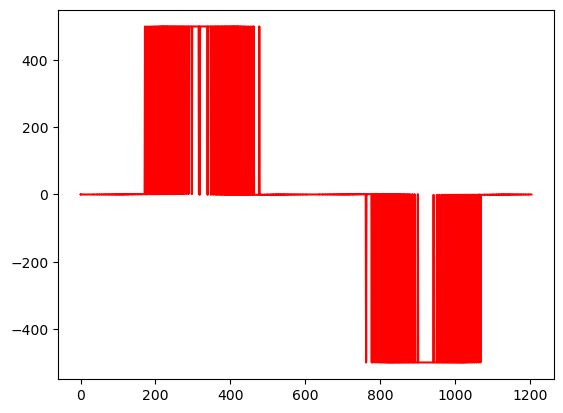

In [7]:
Y1=Pentes(Contours("rond.png",)[1])

X1=np.arange(len(Y1))

plt.plot(X1,Y1,"r")

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.2. Deformed disc

<div>
<img src="rond_defo.png" width="300"/>
</div>

In [ ]:
Y2=Pentes(Contours("rond_defo.png",)[1])

X2=np.arange(len(Y2))

plt.plot(X2,Y2,'b')

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.3. Blured disc

<div>
<img src="rond_blur_light_texture.png" width="300"/>
</div>

In [ ]:
Y3=Pentes(Contours("rond_blur_light_texture.png",)[1])

X3=np.arange(len(Y3))

plt.plot(X3,Y3,'y')

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
Y1=Pentes(Contours("rond.png",)[1])
Y2=Pentes(Contours("rond_defo.png",)[1])
Y3=Pentes(Contours("rond_blur_light_texture.png",)[1])

X1=np.arange(len(Y1))
X2=np.arange(len(Y2))
X3=np.arange(len(Y3))

plt.plot(X1,Y1,"r")
plt.plot(X2,Y2,'b')
plt.plot(X3,Y3,'y')

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

<div>
<img src="exdil.png" width="300"/>
<img src="graphdil.png" width="400"/>
</div>

In [ ]:
# By combining the stretch and the linear interpolation we have managed to solve the problem we faced earlier.
Y1=Pentes(Contours("rond.png",)[1])
Y2=Pentes(Contours("rond_defo.png",)[1])
Y3=Pentes(Contours("rond_blur_light_texture.png",)[1])

X1=np.arange(len(Y1))
X2=np.arange(len(Y2))
X3=np.arange(len(Y3))

y1=interp1d(X1,Y1,kind="linear")
y2=interp1d(X2,Y2,kind="linear")
y3=interp1d(X3,Y3,kind="linear")

l=max(len(Y1),len(Y2),len(Y3))

X1=np.linspace(0,len(Y1)-1,l)
X2=np.linspace(0,len(Y2)-1,l)
X3=np.linspace(0,len(Y3)-1,l)

new1=np.array([y1(x) for x in X1])
new2=np.array([y2(x) for x in X2])
new3=np.array([y3(x) for x in X3])

X1=np.arange(0,l,l/len(Y1))
X2=np.arange(0,l,l/len(Y2))
X3=np.arange(0,l,l/len(Y3))

plt.plot(X1,Y1,"r")
plt.plot(X2,Y2,'b')
plt.plot(X3,Y3,'y')

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

<div>
<img src="difftab.png" width="400"/>
</div>

<div>
<img src="slidingav.png" width="300"/>
</div>

In [ ]:
def MoyGlissante(x, n):
   if len(x) < n:
      return str(n) + "est une valeur invalide"
   L = np.ones(0)
   s = 0
   for i in range(len(x)):
      if i < n - 1:
         for j in range(i + 1):
            s += x[j]
         L = np.append(L, s / (i + 1))
         s = 0
      else:
         for j in range(i - n - 1, i + 1):
            s += x[j]
         L = np.append(L, s / n)
         s = 0
   return L

In [ ]:
Y1=MoyGlissante(Pentes(Contours("rond.png",)[1]),50)
Y2=MoyGlissante(Pentes(Contours("rond_defo.png",)[1]),50)
Y3=MoyGlissante(Pentes(Contours("rond_blur_light_texture.png",)[1]),50)

X1=np.arange(len(Y1))
X2=np.arange(len(Y2))
X3=np.arange(len(Y3))

y1=interp1d(X1,Y1,kind="linear")
y2=interp1d(X2,Y2,kind="linear")
y3=interp1d(X3,Y3,kind="linear")

l=max(len(Y1),len(Y2),len(Y3))

X1=np.linspace(0,len(Y1)-1,l)
X2=np.linspace(0,len(Y2)-1,l)
X3=np.linspace(0,len(Y3)-1,l)

new1=np.array([y1(x) for x in X1])
new2=np.array([y2(x) for x in X2])
new3=np.array([y3(x) for x in X3])

X1=np.arange(0,l,l/len(Y1))
X2=np.arange(0,l,l/len(Y2))
X3=np.arange(0,l,l/len(Y3))

plt.plot(X1,Y1,"r")
plt.plot(X2,Y2,'b')
plt.plot(X3,Y3,'y')

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

<div>
<img src="tableaudiff.png" width="600"/>
</div>

In [ ]:
# Global test function.

def detection_rond(img,valeur_seuillage=160,Moy=50):
   contours = Contours(img,valeur_seuillage)
   rond=0
   Y1=np.ones(0)
   print("Le nombre de contours trouvé est : ",len(contours))

   for contour in contours :
      Y1 = MoyGlissante(Pentes(Contours("rond_1.png", valeur_seuillage)[1]), Moy)

      Y3= MoyGlissante(Pentes(contour), Moy)
      X1 = np.arange(len(Y1))

      X3 = np.arange(len(Y3))
      y3 = interp1d(X3, Y3, kind="linear")
      y1 = interp1d(X1, Y1, kind="linear")

      l = max(len(Y1), len(Y3))
      X1 = np.linspace(0, len(Y1) - 1, l)

      X3 = np.linspace(0, len(Y3) - 1, l)
      new1 = np.array([y1(x) for x in X1])

      new3 = np.array([y3(x) for x in X3])
      #print("rond ",diff(new3, new1),)
      if diff(new3,new1)<125:
         rond+=1

   print("Le nombre de cocci dans l'image donnée est : ",rond)
   return rond

def detection_baton(img,valeur_seuillage=160,Moy=50):
   contours = Contours(img,valeur_seuillage)
   baton=0
   Y1=np.ones(0)
   print("Le nombre de contours trouvé est : ",len(contours))

   for contour in contours :
      Y1 = MoyGlissante(Pentes(Contours("baton_hauriz.png", valeur_seuillage)[1]), Moy)

      Y3= MoyGlissante(Pentes(contour), Moy)
      X1 = np.arange(len(Y1))

      X3 = np.arange(len(Y3))
      y3 = interp1d(X3, Y3, kind="linear")
      y1 = interp1d(X1, Y1, kind="linear")

      l = max(len(Y1), len(Y3))
      X1 = np.linspace(0, len(Y1) - 1, l)

      X3 = np.linspace(0, len(Y3) - 1, l)
      new1 = np.array([y1(x) for x in X1])

      new3 = np.array([y3(x) for x in X3])
      #print("baton ",diff(new3, new1),)
      if diff(new3,new1)<100:
         baton+=1

   print("Le nombre de baciles dans l'image donnée est : ", baton)
   return baton


detection_rond("Groupe_rond.png")
detection_baton("Groupe_rond.png")

# We have greatly improved the function but there is more we can do since this function only works for cocci 
# and doesn't works for bacilli and this is due to the problem of rotation.

In [ ]:
# This is a part i started but didn't finish.
def rotation(image,teta):
    maxl = max(len(image),len(image[0]))
    img=[[255]*maxl*5 for i in range(maxl*5)]

    for i in range(maxl-1):
        for j in range(maxl-1):
            x = 0
            y = 0
            x=int(i*np.cos(teta)+j*np.sin(teta))
            y=int(-i*np.sin(teta)+j*np.cos(teta))

            try:
                img[i][j] = image[x][y]
            except:
                pass
    return img

#  3. OpenCV

## 3.1 OpenCV with personal improvment

In [ ]:
seuillage = 0.7
image_globale = cv2.imread('Groupe_rond.png', cv2.IMREAD_UNCHANGED)
image = cv2.imread('Rond_1.png', cv2.IMREAD_UNCHANGED)
# cv2.matchTemplate permet de comparer deux images et renvoi un tableau
# qui contient les valeur de degrée de resemblance (=image où chaque
# pixel contient [0,1] plus c'est blanc (=1) plus ça resemble)
result = cv2.matchTemplate(image_globale, image, cv2.TM_SQDIFF_NORMED)
cv2.imshow('resultat',result)
# np.where retourn toute les positions des pixels où le degrée de
# resemblance est supérieure à la valeur seuillage
positions = np.where(result >= seuillage)
# La particularité de cette methode c'est qu'elle rend une liste qui contient
# une liste des abssices et une liste des ordonnées [[y1...];[x1...]]
position=[]
for i in range(len(positions[0])):
    position.append((positions[1][i], positions[0][i]))
# Transforme la liste de listes en liste de couple (x,y)
for pos in position:
    cv2.drawMarker(image_globale, pos, (0, 255, 0), 2)
#cv2.imshow('Matches', image_globale)

def SupprimerRep(positions,e):
    L=[]
    for i in range(len(positions)):
        if ((positions[i][1]-positions[i-1][1])**2)+((positions[i][1]-positions[i-1][1])**2)>e:
            L.append(positions[i])
    for l in L:
        cv2.drawMarker(image_globale, l, (0, 255, 0), 10, None,5)
    return L

print(len(SupprimerRep(position, 1.9)))
print(len(position))

cv2.imshow('Matches', image_globale)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3.2 OpenCV with GroupRectangles 

In [ ]:
def detection(X,Y,seuillage=0.6,weight=0.5):
  image_globale = cv2.imread(Y, cv2.IMREAD_UNCHANGED)
  image = cv2.imread(X, cv2.IMREAD_UNCHANGED)
  result = cv2.matchTemplate(image_globale, image, cv2.TM_SQDIFF_NORMED)
  positions = np.where(result >= seuillage)
  positions1 = []
  for i in range(len(positions[0])):
     positions1.append((positions[1][i], positions[0][i]))
  largeur_image = image.shape[1]
  hauteur_image = image.shape[0]
  rectangles = []
  for pos in positions1:
    rect = [int(pos[0]), int(pos[1]), largeur_image, hauteur_image]
    rectangles.append(rect)
    rectangles.append(rect)
  rectangles, weights = cv2.groupRectangles(rectangles,1, weight)
  points = []
  for (x, y, w, h) in rectangles:
    points.append((x, y))
    cv2.drawMarker(image_globale, (x, y),(255, 0, 255), 2,40, 2)
  cv2.waitKey()
  return len(points)
x=np.linspace(0.6,1,20)
for y in x:
  print(detection("baton_hauriz.png", "Groupe_baton.png",y))

plt.show()